###  Question1: Trends of data scientists 
In the notebook, I will use surveys data to answer questions:
1. What is the proportion of professional data scientist in each year's suvery? 
2. Is there a trend?

First, import the necessary libraries: pandas and numpy. To make plots, I use the matplotlib and seaborn. Note *clean data* is the library that contains functions I wrote to clean the data. 

In [1]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns
import os
import clean_data as c # functions to clean data 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Set max display rows to view more rows in the notebook
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

### Clear  and explore surveys in each year
First, let's clean and explore surveys data in each year

In [2]:
# 2011
data_2011 = pd.read_csv('2011.csv', skiprows = 1, encoding="cp1252")
print(f'{data_2011.shape[0]} people have participed the 2011 survey')
# occupations
print(data_2011['Response.6'].value_counts())
# no data scientist or machine learning engineer

2813 people have participed the 2011 survey
Web Application Developer                1066
Desktop Application Developer             419
Server Programmer                         213
Student                                   198
Manager of Developers or Team Leader      195
Other                                     170
Embedded Application Developer            115
IT Staff / System Administrator            85
Executive (VP of Eng, CTO, CIO, etc.)      70
Systems Analyst                            54
IT Manager                                 28
Database Administrator                     23
Kernel / Driver Developer                  10
Name: Response.6, dtype: int64


In [3]:
# 2012
data_2012 = pd.read_csv('2012.csv', skiprows = 1, encoding="cp1252")
print(f'{data_2012.shape[0]} people have participed the 2012 survey')
# occupations
print(data_2012['Response.6'].value_counts())
# no data scientist or machine learning engineer

6243 people have participed the 2012 survey
Web Application Developer                2427
Desktop Application Developer             774
Student                                   471
Server Programmer                         438
Other                                     365
Manager of Developers or Team Leader      346
Embedded Application Developer            326
IT Staff / System Administrator           147
Executive (VP of Eng, CTO, CIO, etc.)     121
Systems Analyst                           104
I don't work in tech                       86
IT Manager                                 66
Database Administrator                     36
Kernel / Driver Developer                  30
Name: Response.6, dtype: int64


In [4]:
# 2013
data_2013 = pd.read_csv('2013.csv', skiprows = 1)
print(f'{data_2013.shape[0]} people have participed the 2013 survey')
# occupations
print(data_2013['Response.6'].value_counts())
# no data scientist or machine learning engineer

9742 people have participed the 2013 survey
Full-Stack Web Developer                 2387
Desktop Software Developer                929
Back-End Web Developer                    768
Student                                   708
Mobile Application Developer              631
Other                                     555
Manager of Developers or Team Leader      535
Enterprise Level Services                 432
Front-End Web Developer                   420
IT Staff / System Administrator           224
Embedded Application Developer            210
Executive (VP of Eng, CTO, CIO, etc.)     195
I don't work in tech                      160
Database Administrator                     64
Name: Response.6, dtype: int64


/Users/qian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# 2014
data_2014 = pd.read_csv('2014.csv', skiprows = 1)
print(f'{data_2014.shape[0]} people have participed the 2014 survey')
# occupations
print(data_2014['Response.5'].value_counts())
# no data scientist or machine learning engineer

7643 people have participed the 2014 survey
Full-Stack Web Developer                 1966
Student                                  1024
Desktop Software Developer                721
Back-End Web Developer                    711
Mobile Application Developer              579
Other                                     528
Front-End Web Developer                   384
Manager of Developers or Team Leader      347
Enterprise Level Services                 263
I don't work in tech                      193
Embedded Application Developer            185
IT Staff / System Administrator           157
DevOps                                    123
Executive (VP of Eng, CTO, CIO, etc.)     104
Database Administrator                     61
Name: Response.5, dtype: int64


So far, surveys 2011-2014 doesn't includes data scientist/machine learning developer and data analyst. Before 2015, data scientist is not indentified as a developer type in the surveys. It is a interesting sign that data scientist didn't get attention before 2015.

In [6]:
# 2015
data_2015 = pd.read_csv('2015.csv', skiprows = 1)
print(f'In 2015, {data_2015.shape[0]} people have participated in the survey\n')
# display counts for each developer type
print(data_2015['Occupation'].value_counts(), '\n')
# Determine whether participant is full time working professional
data_2015['is_full_time'] = ((data_2015['Employment Status'] == 'Employed full-time'))
# Determine if participant is data scientist
data_2015['is_DS'] = data_2015['Occupation'] == "Data scientist"
# Determine if participant is Machine learning developer
data_2015['is_ML'] = data_2015['Occupation'] == "Machine learning developer"     
# calculate the number of participants who are full time working data scientist
num_2015_DS = sum(data_2015['is_DS'] & data_2015['is_full_time'])
# calculate the proportion of the full time working data scientist among all the participants
p_2015_DS = round(num_2015_DS / data_2015.shape[0] * 100, 2)
# calculate the number of participants who are full time working machine learning developer
num_2015_ML = sum(data_2015['is_ML'] & data_2015['is_full_time'])
# calculate the proportion of the full time working machine learning developer among all the participants
p_2015_ML = round(num_2015_ML / data_2015.shape[0] * 100, 2)
print(f'{num_2015_DS} participates are data scientist and the proportion is {p_2015_DS}%')
print(f'{num_2015_ML} participates are Machine Learning developer and the proportion is {p_2015_ML}%')

In 2015, 26086 people have participated in the survey

Full-stack web developer                                 6765
Student                                                  2845
Back-end web developer                                   2104
Desktop developer                                        1735
Front-end web developer                                  1242
Mobile developer - Android                                847
Mobile developer - iOS                                    634
Embedded application developer                            609
Enterprise level services developer                       599
Developer with a statistics or mathematics background     464
Data scientist                                            409
Executive (VP of Eng., CTO, CIO, etc.)                    376
Mobile developer                                          376
System administrator                                      344
DevOps                                                    322
Business intell

/Users/qian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# 2016
data_2016 = pd.read_csv('2016.csv')
print(f'In 2016, {data_2016.shape[0]} people have participated in the survey \n')
# display counts for each developer type
print(data_2016['occupation'].value_counts(), '\n')
# Determine whether participant is full time working professional
data_2016['is_full_time'] = ((data_2016['employment_status'] == 'Employed full-time'))
# Determine if participant is data scientist
data_2016['is_DS'] = data_2016['occupation'] == "Data scientist"
# Determine if participant is Machine learning developer
data_2016['is_ML'] = data_2016['occupation'] == "Machine learning developer"  
# calculate the number of participants who are full time working data scientist
num_2016_DS = sum(data_2016['is_DS'] & data_2016['is_full_time'])
# calculate the proportion of the full time working data scientist among all the participants
p_2016_DS = round(num_2016_DS / data_2016.shape[0] * 100, 2)
# calculate the number of participants who are full time working machine learning developer
num_2016_ML = sum(data_2016['is_ML'])
# calculate the proportion of the full time working machine learning developer among all the participants
p_2016_ML = round(num_2016_ML / data_2016.shape[0] * 100, 2)
print(f'{num_2016_DS} participates are data scientist, and the proportion is {p_2016_DS}%')
print(f'{num_2016_ML} participates are Machine Learning developer, and the proportion is {p_2016_ML}%')

In 2016, 56030 people have participated in the survey 

Full-stack web developer                                 13886
Back-end web developer                                    6061
Student                                                   5619
Desktop developer                                         3390
Front-end web developer                                   2873
other                                                     2585
Enterprise level services developer                       1471
Mobile developer - Android                                1462
Mobile developer                                          1373
Embedded application developer                            1268
Mobile developer - iOS                                    1245
DevOps                                                    1074
Developer with a statistics or mathematics background      960
Executive (VP of Eng., CTO, CIO, etc.)                     888
Data scientist                                             800

In 2015 and 2016, the data-related occupation is Machine learning developer and Data scientist.

Note here, before 2017, participant are only allowed to choose one developer type that best describe them. Since 2017, participants can choose multiple developer types.

In [8]:
# 2017
data_2017= pd.read_csv('2017.csv')
# display data
print(data_2017['DeveloperType'].head(10))

0                                                  NaN
1                                                  NaN
2                                                Other
3                                                  NaN
4    Mobile developer; Graphics programming; Deskto...
5                                                  NaN
6                                                  NaN
7                                        Web developer
8                      Web developer; Mobile developer
9     Mobile developer; Desktop applications developer
Name: DeveloperType, dtype: object


In [9]:
# Apply function c.seperate_occupations_2017 to seperate the occupations
# and determine if a participant are indentified themselves as a data scientist 
# or a machine learning specialist
result = c.seperate_occupations_2017(data_2017, 'DeveloperType')
# Copy the result to current dataframe
data_2017['is_DS_ML'] = result.is_DS_ML  # is data scientist or machine learning specialist
data_2017['is_DEV'] = result.is_DEV  # is developer
# Determine if a participant is working as a full time professional
data_2017['is_full_time'] = data_2017['EmploymentStatus'] == 'Employed full-time'  
# calculate the number of participants who are full time working data scientist 
# or machine learning specialist
num_2017_DS_ML = sum(data_2017['is_DS_ML']&data_2017['is_full_time'])
# calculate the number of participants who are full time working data scientist 
# or machine learning specialist and aslo indentified as a developer
num_2017_DS_ML_with_DEV = (data_2017['is_DS_ML']&(data_2017['is_DEV']&data_2017['is_full_time'])).sum()
# calculate the proportion
p_2017_DS_ML = round((data_2017['is_DS_ML']&data_2017['is_full_time']).mean()*100, 2)
p_2017_DS_ML_with_DEV = round((data_2017['is_DS_ML'] &(data_2017['is_DEV'])&data_2017['is_full_time']).mean() * 100, 2)
#
print(f'In 2017, {data_2017.shape[0]} people have participated in the survey')
print(f'{num_2017_DS_ML} participates are data scientist/Machine learning specialist, and the proportion is {p_2017_DS_ML}%')
print(f'{num_2017_DS_ML_with_DEV} participates are data scientist/Machine learning specialist with developer background, and the proportion is {p_2017_DS_ML_with_DEV}%')

In 2017, 51392 people have participated in the survey
2780 participates are data scientist/Machine learning specialist, and the proportion is 5.41%
2331 participates are data scientist/Machine learning specialist with developer background, and the proportion is 4.54%


In [10]:
# 2018
data_2018 = pd.read_csv('2018.csv')
# Apply function c.seperate_occupations_2017 to seperate the occupations
# and determine if a participant are indentified themselves as a data scientist 
# or a machine learning specialist
data_2018['is_full_time'] = ((data_2018['Employment'] == 'Employed full-time'))
result = c.seperate_occupations_2018_2019(data_2018, 'DevType')
# copy the result to current dataframe
data_2018['is_DS_ML'] = result.is_DS_ML.copy() # is a data scientist 
                                               # or a machine learning specialist
data_2018['is_DA'] = result.is_DA.copy() # is a data analyst 
data_2018['is_DEV'] = result.is_DEV.copy() # is a developer

# calculate the number of participants who are full time working data scientist 
# or machine learning specialist
num_2018_DS_ML = sum(data_2018['is_DS_ML']& data_2018['is_full_time'])
# calculate the number of participants who are full time working data scientist 
# or machine learning specialist and also indentified as a developer
num_2018_DS_ML_with_DEV = (data_2018['is_DS_ML'] &(data_2018['is_DEV'])
                           & data_2018['is_full_time']).sum()

# calculate the number of participants who are full time working data analyst 
num_2018_DA = sum((~data_2018['is_DS_ML'])&(data_2018['is_DA'])
                  & data_2018['is_full_time'])
# calculate the proportions
p_2018_DA = round(num_2018_DA / data_2018.shape[0]*100, 2)
p_2018_DS_ML = round((data_2018['is_DS_ML']& data_2018['is_full_time']).mean()*100, 2)
p_2018_DS_ML_with_DEV = round((data_2018['is_DS_ML'] &(data_2018['is_DEV'])
                               &data_2018['is_full_time']).mean() * 100, 2)

print(f'In 2018, {data_2018.shape[0]} people have participated in the survey')
print(f'{num_2018_DS_ML} participates are data scientist/Machine learning specialist, and the proportion is {p_2018_DS_ML}%')
print(f'{num_2018_DS_ML_with_DEV} participates are data scientist/Machine learning specialist with developer background, and the proportion is {p_2018_DS_ML_with_DEV}%')
print(f'{num_2018_DA} participates are data or business analyst, and the proportion is {p_2018_DA}%')

/Users/qian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In 2018, 98855 people have participated in the survey
4793 participates are data scientist/Machine learning specialist, and the proportion is 4.85%
3136 participates are data scientist/Machine learning specialist with developer background, and the proportion is 3.17%
4006 participates are data or business analyst, and the proportion is 4.05%


In [11]:
# 2019
data_2019 = pd.read_csv('2019.csv')
data_2019['is_full_time'] = ((data_2019['Employment'] == 'Employed full-time'))
result = c.seperate_occupations_2018_2019(data_2019, 'DevType')
data_2019['is_DS_ML'] = result.is_DS_ML
data_2019['is_DA'] = result.is_DA
data_2019['is_DEV'] = result.is_DEV.copy()
num_2019_DS_ML = sum(data_2019['is_DS_ML']&data_2019['is_full_time'])
num_2019_DS_ML_with_DEV = (data_2019['is_DS_ML'] &(data_2019['is_DEV'])
                          &data_2019['is_full_time']).sum()
num_2019_DA = sum((~data_2019['is_DS_ML'])&(data_2019['is_DA'])
                 &data_2019['is_full_time'])
p_2019_DA = round(num_2019_DA / data_2019.shape[0]*100, 2)
p_2019_DS_ML = round((data_2019['is_DS_ML']&
                      data_2019['is_full_time']).mean()*100, 2)
p_2019_DS_ML_with_DEV = round((data_2019['is_DS_ML'] &(data_2019['is_DEV'])
                              &data_2019['is_full_time']).mean() * 100, 2)
print(f'In 2019, {data_2019.shape[0]} people have participated in the survey')
print(f'{num_2019_DS_ML} participates are data scientist/Machine learning specialist, and the proportion is {p_2019_DS_ML}%')
print(f'{num_2019_DS_ML_with_DEV} participates are data scientist/Machine learning specialist with developer background, and the proportion is {p_2019_DS_ML_with_DEV}%')
print(f'{num_2019_DA} participates are data or business analyst, and the proportion is {p_2019_DA}%')

In 2019, 88883 people have participated in the survey
4701 participates are data scientist/Machine learning specialist, and the proportion is 5.29%
3082 participates are data scientist/Machine learning specialist with developer background, and the proportion is 3.47%
3284 participates are data or business analyst, and the proportion is 3.69%


### Visualization 
- plot the total numbers of participants
- plot the proportion of data scientists and data analysts

Total Participants = 
 [2813, 6243, 9742, 7643, 26086, 56030, 51392, 98855, 88883]
Saving figure total_participants


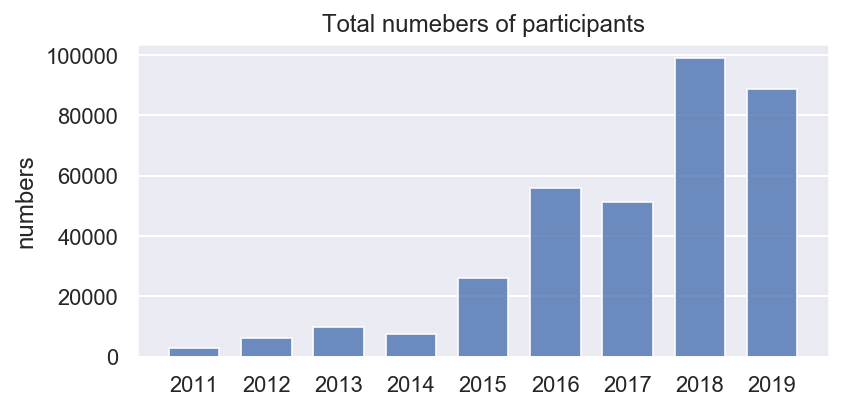

In [12]:
# total numbers of participants
num_total = [data_2011.shape[0], data_2012.shape[0], data_2013.shape[0], 
             data_2014.shape[0], data_2015.shape[0], data_2016.shape[0],
             data_2017.shape[0], data_2018.shape[0], data_2019.shape[0]]
print('Total Participants = \n', num_total)
# plot 
sns.set()
year = np.arange(2011,2020)
width = 0.7
fig = plt.figure(figsize=(6,3))
p1 = plt.bar(year, num_total, width, alpha=0.8)
plt.ylabel('numbers')
plt.title('Total numebers of participants')
plt.xticks(year)
plt.grid(axis='x')
save_fig('total_participants')
plt.show()

What is the proportion of data scientist/machine learning scientist in each year's suvery? Is there a trend?

Saving figure proportion_DS


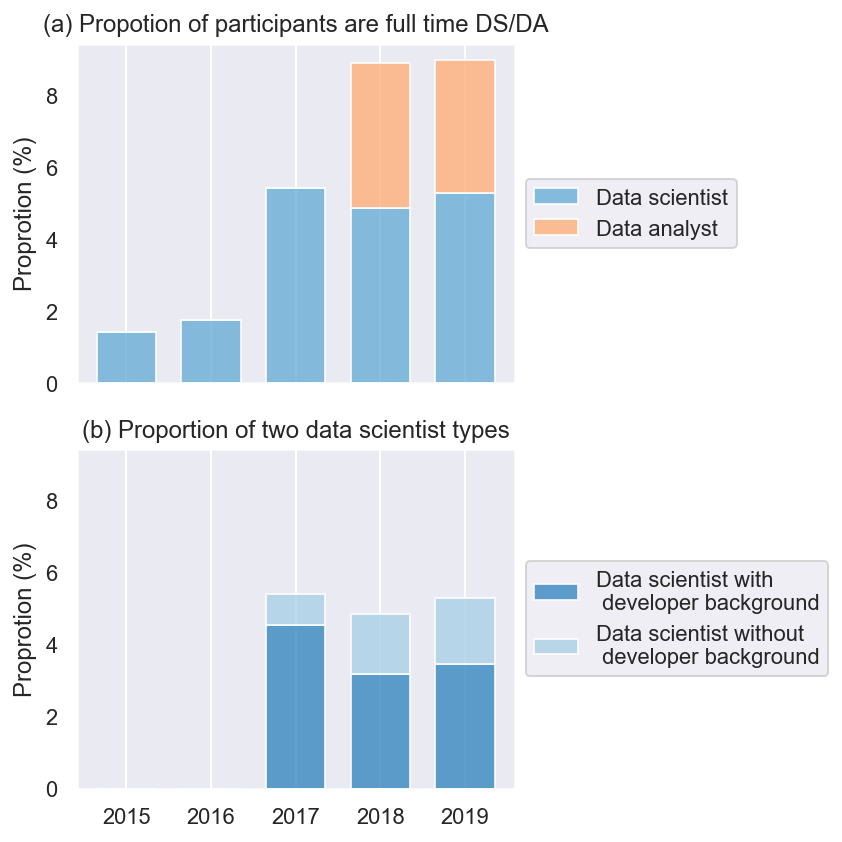

In [13]:
p_DS_ML = [p_2015_DS+p_2015_ML, p_2016_DS+p_2016_ML, 
           p_2017_DS_ML,p_2018_DS_ML, p_2019_DS_ML]
p_DS_ML_without_DEV = [0, 0, 
           p_2017_DS_ML - p_2017_DS_ML_with_DEV,
           p_2018_DS_ML - p_2018_DS_ML_with_DEV, 
           p_2019_DS_ML - p_2019_DS_ML_with_DEV]
p_DS_ML_with_DEV = [0, 0, p_2017_DS_ML_with_DEV, p_2018_DS_ML_with_DEV, 
                    p_2019_DS_ML_with_DEV]
p_DA =[0,0,0,p_2018_DA, p_2019_DA]
year = np.arange(2015,2020)
width = 0.7
color_DS = sns.color_palette("Blues", 5)
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(6,6))
ax[0].bar(year, p_DS_ML, width, alpha=0.8, color=color_DS[2])
ax[0].bar(year, p_DA, width, bottom=p_DS_ML, 
          alpha=0.8, color='#ffb07c')
ax[0].set_ylabel('Proprotion (%)')
ax[0].set_title('(a) Propotion of participants are full time DS/DA')
ax[0].set_xticks(year)
ax[0].legend(('Data scientist',
                            'Data analyst',),
          loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].grid(axis='y')
ax[1].bar(year, p_DS_ML_with_DEV, width, alpha=0.8, color=color_DS[3])
ax[1].bar(year, p_DS_ML_without_DEV, width, 
             bottom=p_DS_ML_with_DEV, color=color_DS[1],
             alpha=0.8)
ax[1].set_ylabel('Proprotion (%)')
ax[1].set_title('(b) Proportion of two data scientist types')
ax[1].set_xticks(year)
ax[1].legend(('Data scientist with \n developer background',
                            'Data scientist without \n developer background',),
          loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].grid(axis='y')
save_fig('proportion_DS')
plt.show()

What is the proportion of students who indentified themselves as a data scientist/Machine Learning engineer or data analyst?

In [14]:
num_student = np.zeros(5)
num_student_DS_ML = np.zeros(5)
num_student_DA = np.zeros(5)
#2015
num_student[0] = sum(data_2015['Employment Status'] == 'I\'m a student')
num_student_DS_ML[0] = data_2015[(data_2015['Employment Status'] == 'I\'m a student')  
                              & (data_2015['is_DS'] | data_2015['is_ML'])].shape[0]

#2016
num_student[1] = sum(data_2016['employment_status'] == 'I\'m a student')
num_student_DS_ML[1] = data_2016[(data_2016['employment_status'] == 'I\'m a student')  
                             & (data_2016['is_DS'] | data_2016['is_ML'])].shape[0]
#2017
num_student[2] = sum(data_2017['Professional'] == 'Student')
num_student_DS_ML[2] = data_2017[(data_2017['Professional'] == 'Student')  
                             & (data_2017['is_DS_ML'])].shape[0]
#2018
num_student[3] = sum(data_2018['Student'] == 'Yes, full-time')
num_student_DS_ML[3] = data_2018[(data_2018['Student'] == 'Yes, full-time')  
                             & (data_2018['is_DS_ML'])].shape[0]
num_student_DA[3] = data_2018[(data_2018['Student'] == 'Yes, full-time')  
                             & (data_2018['is_DA'])].shape[0]
#2019
num_student[4] = sum(data_2019['Student'] == 'Yes, full-time')
num_student_DS_ML[4] = data_2019[(data_2019['Student'] == 'Yes, full-time')  
                             & (data_2019['is_DS_ML'])].shape[0]
num_student_DA[4] = data_2019[(data_2019['Student'] == 'Yes, full-time')  
                             & (data_2019['is_DA'])].shape[0]

p_student_DS_ML = np.round(num_student_DS_ML / num_student * 100, 2)
p_student_DA = np.round(num_student_DA / num_student* 100, 2)

Saving figure proportion_student


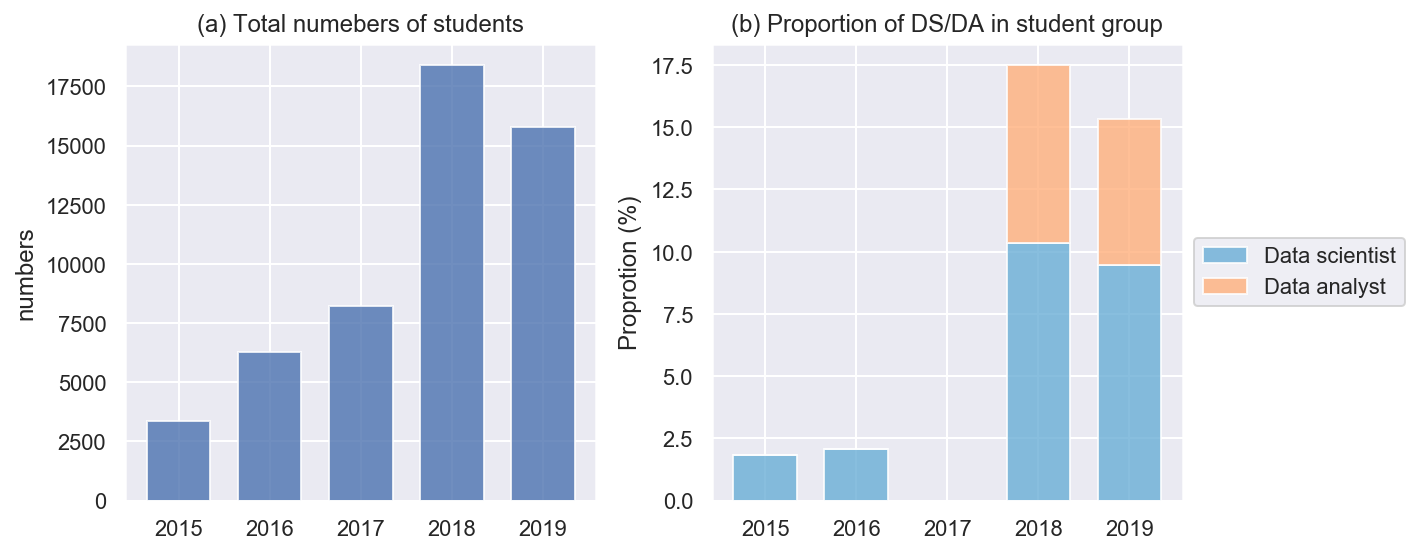

In [15]:
# figure 
year = np.arange(2015,2020)
width = 0.7
fig,ax = plt.subplots(1,2,figsize=(10, 4), sharex=True)
ax[0].bar(year, num_student, width, alpha=0.8)
ax[0].set_ylabel('numbers')
ax[0].set_title('(a) Total numebers of students')
ax[0].set_xticks(year)


ax[1].bar(year, p_student_DS_ML, width, alpha=0.8, color=color_DS[2])
ax[1].bar(year, p_student_DA, width, bottom=p_student_DS_ML, alpha=0.8, color='#ffb07c')
ax[1].set_ylabel('Proprotion (%)')
ax[1].set_title('(b) Proportion of DS/DA in student group')
ax[1].set_xticks(year)
ax[1].legend(('Data scientist', 'Data analyst'),
          loc='center left', bbox_to_anchor=(1, 0.5))
save_fig('proportion_student')
plt.show()

It is interesting to see that more and more student wants to become data scientist/machine learning developer. The proportion is jumping from below 2.5% from 2015 to above 15%.  